In [ ]:
%load_ext autoreload
%autoreload 2

import classes 
atmosphere = classes.Atmo()

In [ ]:
# def plot_data(filter, ref, dark, wv1, wv2, label, color, ls):
#     wv_AA = wv.to(u.AA)
#     trans_med = calc_transmission(filter, ref, dark)
#     index1 = np.abs(wv_AA.value - wv1).argmin()
#     index2 = np.abs(wv_AA.value - wv2).argmin()
#     plt.plot(wv_AA[index1:index2], trans_med[index1:index2], label=label, color=color, linestyle=ls)

In [210]:
# class Data:
#     def __init__(self, dqe, )

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

class Plot:
    def __init__(self, xminIndex, xmaxIndex):
        self.xminIndex = xminIndex
        self.xmaxIndex = xmaxIndex

    def xrange(self, xminIndex, xmaxIndex):
        self.xmin_index = np.abs(self.wavelength.to(u.AA).value - self.xmin).argmin()
        self.xmax_index = np.abs(self.wavelength.to(u.AA).value - self.xmax).argmin()

    # def plot(self):
    #     plt.plot(self.wavelength.to(u.AA)[self.xmin_index: self.xmax_index], self.y[self.xmin_index: self.xmax_index], color = self.color , label = self.label, ls = self.ls)

        

In [213]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import matplotlib.patches as patches
from scipy.interpolate import make_interp_spline

def set_file_path(func):
    def wrapper(self, file_name, *args, **kwargs):
        data = "/Users/jacobvider/Documents/research/hamden/superlotis/throughput/"
        self.file_path = os.path.join(data, file_name)
        return func(self, file_name, *args, **kwargs)
    return wrapper

def readin_csv(func):
    def wrapper(self, *args, **kwargs):
        if not hasattr(self, 'df'):
            self.df = pd.read_csv(self.file_path, names=self.column_names, header=None)
        return func(self, *args, **kwargs)
    return wrapper

def readin_dat(func):
    def wrapper(self, *args, **kwargs):
        file_path = self.file_path
        with open(file_path, 'r') as file:
            file.readline()  # Skip first line
            file.readline()  # Skip second line
            atmo = np.loadtxt(file, dtype=float)
        res = func(self, atmo, *args, **kwargs)
        return res
    return wrapper

class Atmo:
    def __init__(self, file_name = None):
        if file_name:
            self.set_file_path(file_name)

class DQE:
    def __init__(self, file_name=None, column_names=["x", "y"]):
        self.column_names = column_names
        self.file_path = None
        self.color = 'black'
        self.ls = '-'
        self.label = None

        # self.xmin_index = None
        # self.xmax_index = None
        if file_name:
            self.set_file_path(file_name)

    @set_file_path
    def set_file_path(self, file_name):
        pass

    @readin_csv
    def load_values(self):
        self.wavelength = self.df["x"].values * u.nm
        self.y = self.df["y"].values

    def interp_qe(self):
        self.load_values()
        x = self.wavelength.value
        y = self.y
        self.xrange = np.linspace(np.min(x), np.max(x), 150)
        self.yinterp = np.interp(self.xrange, x, y)

    def plot(self):
        # fig, ax = plt.subplots(figsize=(12,6))

        self.xmin_index = np.abs(self.wavelength.to(u.AA).value - self.xmin).argmin()
        self.xmax_index = np.abs(self.wavelength.to(u.AA).value - self.xmax).argmin()
        
        plt.plot(self.wavelength.to(u.AA)[self.xmin_index: self.xmax_index], self.y[self.xmin_index: self.xmax_index], color = self.color , label = self.label, ls = self.ls)


BUV_file = "dqe/BUV_extracted.csv"
BUV = DQE(BUV_file)
BUV.load_values()
BUV.interp_qe()
BUV.yinterp
BUV.xmin = 3000
BUV.xmax = 1000
BUV.wavelength.to(u.AA).value - BUV.xmin
# xmin_index = np.abs(BUV.wavelength.to(u.AA).value - BUV.xmin).argmin()
# xmax_index = np.abs(BUV.wavelength.to(u.AA).value - BUV.xmax).argmin()

# plt.scatter(BUV.xrange[300:400], BUV.yinterp[300:400], color = 'blue')
# plt.scatter(BUV.wavelength[300:400], BUV.y[300:400], color = 'red')





array([-491.15508309, -412.99101124, -440.69382643, -362.05612084,
       -298.96342231, -194.17131374, -111.34886137,    9.38003046,
        149.06156518,  288.62196174,  428.09006254,  542.04679527,
        655.99363916,  789.41740697,  910.21688582, 1037.43349557,
       1177.16579295, 1316.85771094, 1456.51847911, 1596.14348269,
       1735.7915602 , 1875.45578947, 2015.06233389, 2154.64811178,
       2294.25119511, 2433.88773565, 2573.49081899, 2713.09274863,
       2852.70160045, 2992.31160596, 3131.91699669, 3271.53853918,
       3411.13585403, 3550.71701713, 3690.29356543, 3829.87011374,
       3969.4282029 , 4108.97936988, 4248.51323141, 4388.02978748,
       4527.52442332, 4666.99598521, 4806.44562687, 4945.8721946 ,
       5085.2676125 , 5224.63534169, 5363.97192106, 5496.93836346,
       5617.23106175, 5731.17067215, 5838.76618387, 5940.02182713,
       6041.26319339, 6142.50773232, 6243.74433958, 6344.97936051,
       6446.21914044, 6547.45892037, 6648.71139097, 6756.30425

[ 293.98640288  307.96320907  318.13124675  324.19370432  327.70838399
  330.40489648  334.11780434  336.69487048  343.07424115  350.71909774
  357.0923497   362.41171243  367.02933031  369.87533927  372.44139173
  375.00839599  377.70503539  381.4188739   384.88033738  388.46314477
  392.30957957  395.63897553  399.34993748  403.18949817  407.03032793
  412.77848003  419.78952251  428.06888213  438.24858826  450.33282277
  463.68286009  477.66358886  491.00424663  508.14668153  522.11379667
  536.07802758  550.04133552  564.00360514  577.96702845  591.92952881
  605.89202917  619.71268891  633.81829895  647.78322207  661.74653002
  675.70672298  689.66333948  703.61522583  717.56226665  731.50907673
  745.45381016  759.39531323  773.33693168  787.27358923  800.5724601
  811.96702747  822.09179863  831.58235381  840.43826243  848.65827808
  856.24433459  863.82954505  871.41517854  878.99996598  885.95170075
  892.90237796  899.85203992  906.16793007  912.48331259  918.79818749
  925.1

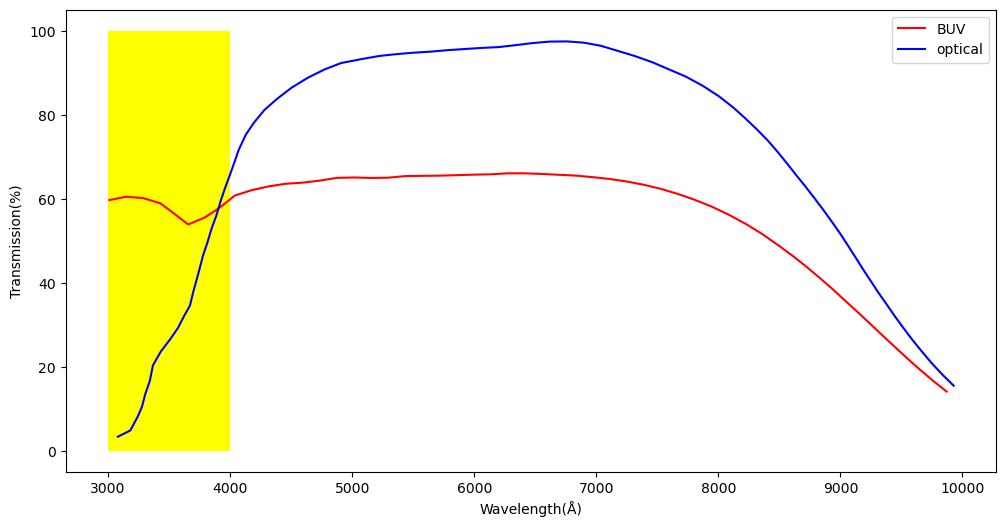

In [219]:
fig, ax = plt.subplots(figsize = (12,6))
BUV_file = "dqe/BUV_extracted.csv"
BUV = DQE(BUV_file)
BUV.color = 'red'
BUV.label = 'BUV'
BUV.ls = '-'
BUV.xmin = 3000
BUV.xmax = 10000
BUV.load_values()
BUV.plot()

optical_file = "dqe/optical_extracted.csv"
optical = DQE(optical_file)
optical.color = 'blue'
optical.label = 'optical'
optical.ls = '-'
optical.xmin = 3010
optical.xmax = 10000
optical.load_values()
optical.plot()

rect = patches.Rectangle((3000,0),1000,100, linewidth = 1, edgecolor='none', facecolor='yellow', alpha = 1)
ax.add_patch(rect)

ax.set_xlabel("Wavelength(\u00C5)")
ax.set_ylabel("Transmission(%)")
ax.legend()
fig.savefig('plots/QE.png')

print(optical.wavelength)

In [182]:
from scipy.interpolate import make_interp_spline
optical_file = "dqe/optical_extracted.csv"
optical = DQE(optical_file)
optical.load_values()
b = make_interp_spline(optical.wavelength, optical.y)
x = optical.wavelength.value
y = optical.y
xrange = np.linspace(np.min(x), np.max(x), 150)
yinterp = np.interp(xrange, x, y)



array([ 1.71227553,  2.2856649 ,  2.85905426,  3.45323112,  4.16867157,
        5.02071869,  7.67887678, 11.11977016, 15.82423495, 21.04536481,
       23.54557741, 25.42689281, 27.37151129, 29.50876529, 32.28319838,
       35.09509421, 40.59630139, 45.96299862, 50.38645019, 54.72886153,
       59.23793801, 63.39830512, 67.30768138, 71.36438197, 74.49402353,
       76.82190561, 78.79210005, 80.51457295, 81.94304097, 83.19451378,
       84.3580821 , 85.4485019 , 86.521814  , 87.39446141, 88.26710882,
       89.08047077, 89.78510602, 90.48974126, 91.11429994, 91.65826836,
       92.20223679, 92.53820782, 92.81366179, 93.08911576, 93.3572549 ,
       93.6060737 , 93.85489249, 94.06281847, 94.21495189, 94.36708532,
       94.50152117, 94.62270684, 94.74389251, 94.83997399, 94.92633855,
       95.0127031 , 95.13273758, 95.25779194, 95.38224821, 95.47635123,
       95.57045426, 95.66455728, 95.75866031, 95.85276333, 95.93819462,
       96.00501444, 96.07183426, 96.1863475 , 96.34931167, 96.51

In [ ]:
## spline interpolation vs polynominal interpolation?


class Atmo
class Target
class Coating
class Filters
class DQE

class Atmo(object):

    def __init__(self,filename):
        self.filename = filename

    def load_data(self):
        self.data = pd.read_csv(self.filename, comment='#', header=None, delim_whitespace=True)
        self.data.columns = ['x', 'y']
        self.wavelength = self.df["x"].values * u.nm
        self.y = self.df["y"].values

    def create_interpolator(self, method="linear"):
        self.interpolation_function = sp.interpolate.interp1d(x=self.x, y=self.y, method=method)

    def interpolate(self, wavelengths):
        return self.interpolation_function(wavelengths)



preprossing (generate transmission files for each filter, calc_transmission)
(import data from preprocessing) -> processing (classes) 
post-processing (plots)

<Quantity 3980. Angstrom>

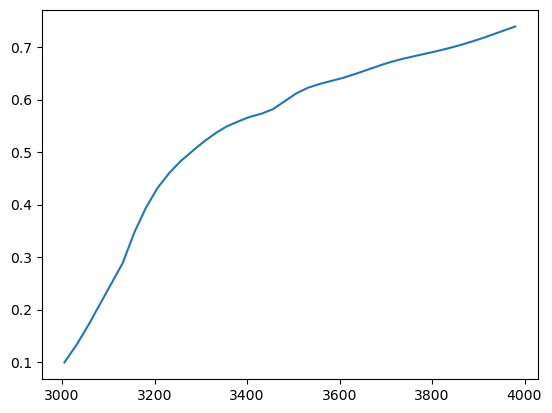

In [43]:
import pandas as pd
import scipy as sp
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

class Atmo(object):
    def __init__(self,filename):
        self.filename = filename
        self.load_data()
        self.create_interpolator(method = "linear")

    def load_data(self):
        with open(self.filename, 'r') as file:
            file.readline()
            file.readline()
            self.data = np.loadtxt(file, dtype=float)
        self.data[:, 1] = 10 ** (-0.4 * self.data[:, 1])
        self.wavelength = self.data[:, 0][:40] * u.AA
        self.y = self.data[:, 1][:40]

    def create_interpolator(self, method):
        self.interpolation_function = sp.interpolate.interp1d(x=self.wavelength, y=self.y, kind=method)

    def interpolate(self, wavelengths):
        return self.interpolation_function(wavelengths)
    
    
apo = Atmo("/Users/jacobvider/Documents/research/hamden/superlotis/throughput/extinction_sites/apo.dat")
wv = np.linspace(start=apo.wavelength.min(), stop=apo.wavelength.max(), num=10000)
apo_interp = apo.interpolate(wv)

plt.plot(wv, apo_interp)
# atmo_apo.interpolate(wv)

In [34]:
np.linspace(start=3005, stop=7000, num=10000)

array([3005.        , 3005.39953995, 3005.79907991, ..., 6999.20092009,
       6999.60046005, 7000.        ])

array([[ 1.76347333e+00,  1.76347333e+00,  1.76347333e+00, ...,
         1.76347333e+00,  1.76347333e+00,  1.76347333e+00],
       [ 1.75749231e+00,  1.75749877e+00,  1.75750523e+00, ...,
         1.75255308e+00,  1.75254619e+00,  1.75253929e+00],
       [ 1.75151128e+00,  1.75152421e+00,  1.75153713e+00, ...,
         1.71244673e+00,  1.71244831e+00,  1.71244988e+00],
       ...,
       [-7.21376832e-03, -4.20375132e-02,  4.98557436e-02, ...,
         1.67292173e-02,  1.71109536e-02,  1.64546408e-02],
       [-1.01967916e-03, -5.18977066e-02,  4.73803718e-02, ...,
         1.68333152e-02,  1.59920178e-02,  1.62453226e-02],
       [ 5.17441000e-03, -6.17579000e-02,  4.49050000e-02, ...,
         1.55296000e-02,  1.68326000e-02,  1.68832000e-02]])

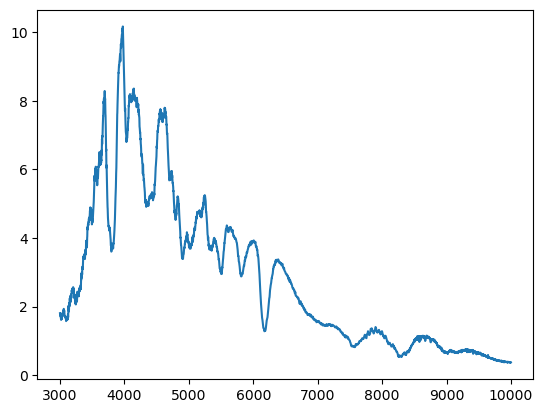

In [28]:
class SN1a:
    def __init__(self,filename):
        self.filename = filename
        self.load_data()
        self.create_interpolator(method = "linear")

    def load_data(self):
        spec = np.loadtxt(self.filename, skiprows=1)
        self.wavelength = spec[:, 0]
        self.y = spec[:, 1]*10**14

    def create_interpolator(self, method):
        self.interpolation_function = sp.interpolate.interp1d(x=self.wavelength, y=self.y, kind=method)

    def interpolate(self, wavelengths):
        return self.interpolation_function(wavelengths)
    
    def set_xindex(self, xmin, xmax):
        self.xmin_index = np.abs(self.wavelength - xmin).argmin()
        self.xmax_index = np.abs(self.wavelength - xmax).argmin()
        return self.xmin_index, self.xmax_index
    

sn1992a = SN1a("/Users/jacobvider/Documents/research/hamden/superlotis/throughput/sn1a_targets/foley-sn2011iv-max (1).flm")
wv = np.linspace(3005,sn1992a.wavelength, 10000)
interp1922a = sn1992a.interpolate(wv)

xmin, xmax = sn1992a.set_xindex(3000, 10000)

plt.plot(sn1992a.wavelength[xmin:xmax], sn1992a.y[xmin:xmax])

In [ ]:
class Filters:
    def __init__(self, filename):
        self.filename = filename

    def 
    pd.read_csv(self.filename, skiprows = 14, sep = '\t', header = None)

In [ ]:
import pandas as pd
pd.read_csv('/Users/jacobvider/Documents/research/hamden/superlotis/instrument_throughput/filter_transmission_curves (1)/oceanview_data (1)/backup_data (1)/oceanview-data (2)/*.txt', skiprows = 14, sep = '\t', header = None)

In [261]:
with open('/Users/jacobvider/Documents/research/hamden/superlotis/throughput/extinction_sites/apo.dat', 'r') as file:
    # Skip the first two lines
    file.readline()
    file.readline()
    # Load the data from the file
    atmo = np.loadtxt(file, dtype=float)

# Assuming 'apo' is defined elsewhere in your code
# Modify the 'atmo' array as needed
atmo[:, 1] = 10 ** (-0.4 * atmo[:, 1])
wv_apo = atmo[:, 0][:40]
trans_apo = atmo[:, 1][:40]
atmo[:, 1]


array([0.09920007, 0.13080008, 0.16730002, 0.20750091, 0.24699946,
       0.28619893, 0.34440068, 0.39200174, 0.42999955, 0.4585007 ,
       0.48169928, 0.50069817, 0.51890039, 0.53510129, 0.54860025,
       0.55809997, 0.56690201, 0.57270108, 0.58119785, 0.5958981 ,
       0.61120092, 0.62209971, 0.62940183, 0.63499748, 0.64060157,
       0.64760173, 0.65529975, 0.66310148, 0.67019935, 0.67630095,
       0.68149708, 0.68629684, 0.69120043, 0.6964982 , 0.70230215,
       0.70880048, 0.7158005 , 0.72350244, 0.73150281, 0.7392988 ,
       0.74640063, 0.75259963, 0.75810262, 0.76309745, 0.76799784,
       0.77270194, 0.77739904, 0.78200225, 0.78619812, 0.79019813,
       0.79399908, 0.7975979 , 0.80130158, 0.80489643, 0.80870104,
       0.81239642, 0.81610117, 0.81989833, 0.82350075, 0.82710377,
       0.83050069, 0.83369654, 0.83679678, 0.8396997 , 0.8424963 ,
       0.8453022 , 0.84800029, 0.85050329, 0.85280159, 0.85490134,
       0.85680107, 0.85869711, 0.86059734, 0.86250178, 0.86429

class Atmo:
    def __init__:
        self.filename = None

    def load_data(self):
        df = pd.read_csv(self.filename, comment='#', header=None, delim_whitespace=True)
        


class Transmission(filename, )

def __init__:
#variables

def interpolator:


class Spectrum


class ExtractData
    def extract_csv

    def extract_flm

    def 

class Interpolate

class PlotData

